In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
df = pd.read_csv(r"C:\Users\owner\Downloads\VC_Pandemic_Investments.csv", na_values = ' ?')

df.head()
df.shape

(648, 7)

In [4]:
china = df[(df['Country'] == 'China')]

china.head()

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
417,China,Sequoia Capital China,"Jul 20, 2020",Xiaopeng Motors,—,Series C - Xiaopeng Motors,$500M
418,China,Sequoia Capital China,"Jul 15, 2020",TUNGEE,Yes,Series B - TUNGEE,CN¥120M
419,China,Sequoia Capital China,"Jul 13, 2020",AccuMedical,Yes,Series B - AccuMedical,CN¥100M
420,China,Sequoia Capital China,"Jul 8, 2020",Kuaidian Yuedu,Yes,Series C - Kuaidian Yuedu,$100M
421,China,Sequoia Capital China,"Jun 29, 2020",Zuoyebang,—,Series E - Zuoyebang,$750M


In [5]:
usa = df[(df['Country'] == 'USA')]

usa.tail()

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
412,USA,Bessemer Venture Partners,"Mar 2, 2020",Rigetti Computing,Yes,Series D - Rigetti Computing,$71M
413,USA,Bessemer Venture Partners,"Feb 14, 2020",Toast,Yes,Series F - Toast,$400M
414,USA,Bessemer Venture Partners,"Feb 4, 2020",Hinge Health,Yes,Series C - Hinge Health,$90M
415,USA,Bessemer Venture Partners,"Jan 31, 2020",Breathwrk,—,Seed Round - Breathwrk,—
416,USA,Bessemer Venture Partners,"Jan 21, 2020",Unito,Yes,Series A - Unito,$10.5M


# Most Optimistic and Conservative Investors US vs China
## Who has the money?

### For a better comparison, compare each firm with number of investment bets pre-pandemic

In [49]:
#most active US VCs
usa_investments = dict(usa['VC Name'].value_counts())
usa_investments

{'Accel': 59,
 'A16Z': 52,
 'Lightspeed Venture Partners': 41,
 'Sequoia Capital': 40,
 'Khosla Ventures': 37,
 'Index Ventures': 37,
 'Founders Fund': 27,
 'Bessemer Venture Partners': 23,
 'New Enterprise Associates': 22,
 'First Round Capital': 18,
 'Union Square Ventures': 15,
 'Softbank Vision Fund': 14,
 'Greylock': 14,
 'Floodgate': 12,
 'Benchmark': 6}

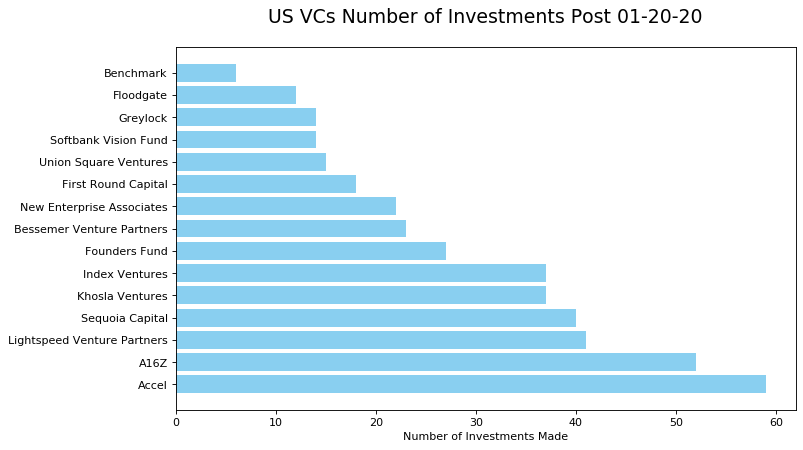

In [175]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='w')
plt.barh(range(len(usa_investments.keys())), usa_investments.values(), color='#89cff0')
plt.yticks(range(len(usa_investments.values())), usa_investments.keys(), rotation=360)
#plt.tight_layout()

plt.xlabel('Number of Investments Made')
plt.title("US VCs Number of Investments Post 01-20-20", fontsize=17, y=1.05)

plt.show()

In [52]:
#most active chinese VCs
china_investments = dict(china['VC Name'].value_counts())
china_investments

{'Qiming Venture Partners': 38,
 'Sequoia Capital China': 38,
 'GGV Capital': 32,
 'Hillhouse Capital Group': 22,
 'ZhenFund': 16,
 'GSR Ventures': 14,
 'IDG Capital': 11,
 'Legend Capital': 11,
 'DCM Ventures': 9,
 'Shenzhen Capital Group': 8,
 'Matrix Partners China': 7,
 'Shunwei Capital': 7,
 'Morningside Venture Capital': 7,
 'Source Code Capital': 7,
 'Gaorong Capital': 4}

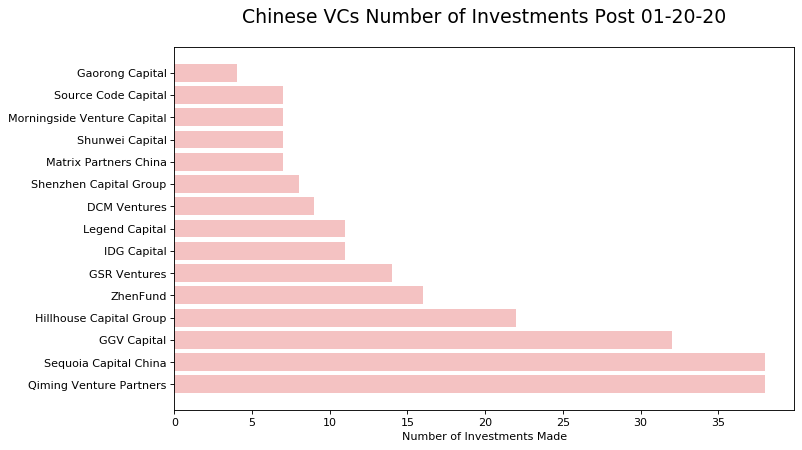

In [176]:
plt.figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='w')

plt.barh(range(len(china_investments.keys())), china_investments.values(), color='#f4c2c2')

plt.yticks(range(len(china_investments.values())), china_investments.keys(), rotation=360)

plt.xlabel('Number of Investments Made')
plt.title("Chinese VCs Number of Investments Post 01-20-20", fontsize=17, y=1.05)

#plt.tight_layout()
plt.show()

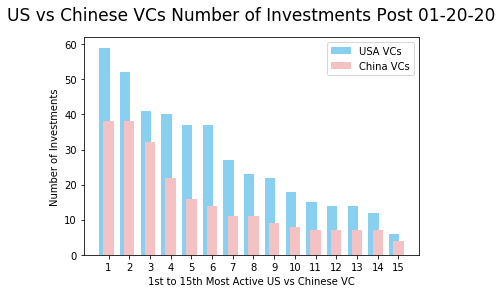

In [191]:
X = np.arange(len(china_investments))
ax = plt.subplot(111)

ax.bar(X-0.2, usa_investments.values(), width=0.5, color='#89cff0', align='center')
#plt.xticks(range(len(usa_investments.values())), usa_investments.keys(), rotation=90)

ax.bar(X, china_investments.values(), width=0.5, color='#f4c2c2', align='center')
#plt.xticks(range(len(china_investments.values())))

#could have done this more elegantly and automatically, but decided to rush it
plt.xticks(np.arange(15), ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']) 

ax.legend(('USA VCs','China VCs'))
plt.title("US vs Chinese VCs Number of Investments Post 01-20-20", fontsize=17, y=1.05)

plt.xlabel('1st to 15th Most Active US vs Chinese VC')
plt.ylabel('Number of Investments')

plt.show()

# The most active investors, who likes to be the lead (lead investment decisions/total investment made by single VC)


In [76]:
df['Lead Investor'].value_counts()

—      365
Yes    257
No      26
Name: Lead Investor, dtype: int64

In [77]:
usa_lead = usa[(usa['Lead Investor'] == 'Yes')]
usa_lead.head()

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
2,USA,Sequoia Capital,"Jul 7, 2020",mmhmm,Yes,Seed Round - mmhmm,$4.5M
4,USA,Sequoia Capital,"Jun 17, 2020",Twin Health,Yes,Series A - Twin Health,$18M
6,USA,Sequoia Capital,"Jun 1, 2020",Vara,Yes,Pre Seed Round - Vara,—
7,USA,Sequoia Capital,"May 27, 2020",CaptivateIQ,Yes,Series A - CaptivateIQ,$13M
12,USA,Sequoia Capital,"May 13, 2020",Mos,Yes,Series A - Mos,$13.3M


In [80]:
usa_lead_investments = dict(usa_lead['VC Name'].value_counts())
usa_lead_investments

{'A16Z': 34,
 'Accel': 24,
 'Index Ventures': 19,
 'Sequoia Capital': 14,
 'Lightspeed Venture Partners': 13,
 'Khosla Ventures': 13,
 'Softbank Vision Fund': 10,
 'Bessemer Venture Partners': 9,
 'New Enterprise Associates': 7,
 'Founders Fund': 7,
 'First Round Capital': 6,
 'Union Square Ventures': 5,
 'Floodgate': 5,
 'Greylock': 3,
 'Benchmark': 1}

In [81]:
usa_lead_percentage = dict((k, float(usa_lead_investments[k]) / usa_investments[k]) for k in usa_lead_investments)
usa_lead_percentage

{'A16Z': 0.6538461538461539,
 'Accel': 0.4067796610169492,
 'Index Ventures': 0.5135135135135135,
 'Sequoia Capital': 0.35,
 'Lightspeed Venture Partners': 0.3170731707317073,
 'Khosla Ventures': 0.35135135135135137,
 'Softbank Vision Fund': 0.7142857142857143,
 'Bessemer Venture Partners': 0.391304347826087,
 'New Enterprise Associates': 0.3181818181818182,
 'Founders Fund': 0.25925925925925924,
 'First Round Capital': 0.3333333333333333,
 'Union Square Ventures': 0.3333333333333333,
 'Floodgate': 0.4166666666666667,
 'Greylock': 0.21428571428571427,
 'Benchmark': 0.16666666666666666}

In [82]:
usa_lead_percentage_sorted = sorted(usa_lead_percentage.items(), key=lambda x: x[1], reverse=True)
usa_lead_percentage_sorted

[('Softbank Vision Fund', 0.7142857142857143),
 ('A16Z', 0.6538461538461539),
 ('Index Ventures', 0.5135135135135135),
 ('Floodgate', 0.4166666666666667),
 ('Accel', 0.4067796610169492),
 ('Bessemer Venture Partners', 0.391304347826087),
 ('Khosla Ventures', 0.35135135135135137),
 ('Sequoia Capital', 0.35),
 ('First Round Capital', 0.3333333333333333),
 ('Union Square Ventures', 0.3333333333333333),
 ('New Enterprise Associates', 0.3181818181818182),
 ('Lightspeed Venture Partners', 0.3170731707317073),
 ('Founders Fund', 0.25925925925925924),
 ('Greylock', 0.21428571428571427),
 ('Benchmark', 0.16666666666666666)]

In [30]:
#China lead investors
china_lead = china[(china['Lead Investor'] == 'Yes')]
china_lead.head()

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
418,China,Sequoia Capital China,"Jul 15, 2020",TUNGEE,Yes,Series B - TUNGEE,CN¥120M
419,China,Sequoia Capital China,"Jul 13, 2020",AccuMedical,Yes,Series B - AccuMedical,CN¥100M
420,China,Sequoia Capital China,"Jul 8, 2020",Kuaidian Yuedu,Yes,Series C - Kuaidian Yuedu,$100M
424,China,Sequoia Capital China,"Jun 22, 2020",Canva,Yes,Venture Round - Canva,$60M
426,China,Sequoia Capital China,"May 27, 2020",Atom Bioscience & Pharmaceutical,Yes,Series B - Atom Bioscience & Pharmaceutical,$30M


In [61]:
china_lead_investments = dict(china_lead['VC Name'].value_counts())
china_lead_investments

{'Sequoia Capital China': 16,
 'Qiming Venture Partners': 15,
 'GGV Capital': 14,
 'Hillhouse Capital Group': 11,
 'GSR Ventures': 6,
 'Matrix Partners China': 5,
 'IDG Capital': 5,
 'Shenzhen Capital Group': 4,
 'Legend Capital': 4,
 'Source Code Capital': 3,
 'Gaorong Capital': 2,
 'Shunwei Capital': 1,
 'ZhenFund': 1}

In [68]:
china_lead_percentage = dict((k, float(china_lead_investments[k]) / china_investments[k]) for k in china_lead_investments)
china_lead_percentage

{'Sequoia Capital China': 0.42105263157894735,
 'Qiming Venture Partners': 0.39473684210526316,
 'GGV Capital': 0.4375,
 'Hillhouse Capital Group': 0.5,
 'GSR Ventures': 0.42857142857142855,
 'Matrix Partners China': 0.7142857142857143,
 'IDG Capital': 0.45454545454545453,
 'Shenzhen Capital Group': 0.5,
 'Legend Capital': 0.36363636363636365,
 'Source Code Capital': 0.42857142857142855,
 'Gaorong Capital': 0.5,
 'Shunwei Capital': 0.14285714285714285,
 'ZhenFund': 0.0625}

In [69]:
china_lead_percentage_sorted = sorted(china_lead_percentage.items(), key=lambda x: x[1], reverse=True)
china_lead_percentage_sorted

[('Matrix Partners China', 0.7142857142857143),
 ('Hillhouse Capital Group', 0.5),
 ('Shenzhen Capital Group', 0.5),
 ('Gaorong Capital', 0.5),
 ('IDG Capital', 0.45454545454545453),
 ('GGV Capital', 0.4375),
 ('GSR Ventures', 0.42857142857142855),
 ('Source Code Capital', 0.42857142857142855),
 ('Sequoia Capital China', 0.42105263157894735),
 ('Qiming Venture Partners', 0.39473684210526316),
 ('Legend Capital', 0.36363636363636365),
 ('Shunwei Capital', 0.14285714285714285),
 ('ZhenFund', 0.0625)]

In [97]:
#Average check sizes leader, follower, in the middle
matrix = china[(china['VC Name'] == 'Matrix Partners China')]
matrix

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
522,China,Matrix Partners China,"Jun 5, 2020",Nebula Graph,—,Seed Round - Nebula Graph,$8M
523,China,Matrix Partners China,"May 19, 2020",Simple Love,Yes,Series A - Simple Love,CN¥400M
524,China,Matrix Partners China,"Apr 7, 2020",Lightelligence,Yes,Series A - Lightelligence,$26M
525,China,Matrix Partners China,"Apr 2, 2020",Rgenta Therapeutics,Yes,Seed Round - Rgenta Therapeutics,$20M
526,China,Matrix Partners China,"Mar 17, 2020",Tongcheng Bills Network,—,Series B - Tongcheng Bills Network,CN¥150M
527,China,Matrix Partners China,"Mar 12, 2020",Starfield Food & Science Technology,Yes,Angel Round - Starfield Food & Science Technology,—
528,China,Matrix Partners China,"Feb 28, 2020",Feiyu,Yes,Series A - Feiyu,$20M


# Startups Invested by 3 or more VCs


In [120]:
df['Organization Name'].value_counts().head(15)

Vedantu           5
Figma             5
Run The World     5
Kuaidian Yuedu    4
Karius            3
Q Bio             3
Personio          3
Sensors Data      3
DEEPEXI           3
Cockroach Labs    3
PROPS             3
Netskope          3
Siren             3
Encootech         3
Yuanfudao         2
Name: Organization Name, dtype: int64

In [116]:
# Vedantu: Indian Interactive Online tutoring platform
vedantu = df[df['Organization Name'] == 'Vedantu']
vedantu

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
266,USA,Accel,"Jul 15, 2020",Vedantu,—,Series D - Vedantu,$100M
314,USA,Accel,"Feb 13, 2020",Vedantu,—,Series C - Vedantu,$24M
473,China,Legend Capital,"Jul 15, 2020",Vedantu,—,Series D - Vedantu,$100M
564,China,GGV Capital,"Jul 15, 2020",Vedantu,—,Series D - Vedantu,$100M
591,China,GGV Capital,"Feb 13, 2020",Vedantu,Yes,Series C - Vedantu,$24M


In [112]:
# Figma: UIUX design tool
# https://www.figma.com/
figma = df[df['Organization Name'] == 'Figma']
figma

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
19,USA,Sequoia Capital,"Apr 30, 2020",Figma,—,Series D - Figma,$50M
73,USA,Founders Fund,"Apr 30, 2020",Figma,—,Series D - Figma,$50M
183,USA,Index Ventures,"Apr 30, 2020",Figma,—,Series D - Figma,$50M
356,USA,A16Z,"Apr 30, 2020",Figma,Yes,Series D - Figma,$50M
386,USA,Greylock,"Apr 30, 2020",Figma,—,Series D - Figma,$50M


In [117]:
# Run the World: create virtual event platform with plug and play templates
# https://www.runtheworld.today/
run_the_world = df[df['Organization Name'] == 'Run The World']
run_the_world

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
70,USA,Founders Fund,"May 21, 2020",Run The World,Yes,Series A - Run The World,$10.8M
348,USA,A16Z,"May 21, 2020",Run The World,Yes,Series A - Run The World,$10.8M
371,USA,A16Z,"Feb 27, 2020",Run The World,—,Seed Round - Run The World,$4M
571,China,GGV Capital,"May 21, 2020",Run The World,—,Series A - Run The World,$10.8M
637,China,GSR Ventures,"Feb 27, 2020",Run The World,—,Seed Round - Run The World,$4M


In [118]:
# Kuaidian Yuedu: reading app that presents novels in a dialogue-based, text message reading format
# https://www.kuaidianyuedu.com/
kuaidian_yuedu = df[df['Organization Name'] == 'Kuaidian Yuedu']
kuaidian_yuedu

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
420,China,Sequoia Capital China,"Jul 8, 2020",Kuaidian Yuedu,Yes,Series C - Kuaidian Yuedu,$100M
455,China,Morningside Venture Capital,"Jul 8, 2020",Kuaidian Yuedu,—,Series C - Kuaidian Yuedu,$100M
565,China,GGV Capital,"Jul 8, 2020",Kuaidian Yuedu,—,Series C - Kuaidian Yuedu,$100M
639,China,DCM Ventures,"Jul 8, 2020",Kuaidian Yuedu,No,Series C - Kuaidian Yuedu,$100M


In [115]:
# Karius: liquid biopsy for infectious diseases
# https://kariusdx.com/
karius = df[df['Organization Name'] == 'Karius']
karius

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
116,USA,Lightspeed Venture Partners,"Feb 24, 2020",Karius,—,Series B - Karius,$165M
211,USA,Softbank Vision Fund,"February 24, 2020",Karius,Yes,Series B - Karius,$165M
240,USA,Khosla Ventures,"Feb 24, 2020",Karius,—,Series B - Karius,$165M


In [122]:
q_bio = df[df['Organization Name'] == 'Q Bio']
q_bio

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
81,USA,Founders Fund,"Feb 20, 2020",Q Bio,—,Series B - Q Bio,$40M
242,USA,Khosla Ventures,"Feb 20, 2020",Q Bio,—,Series B - Q Bio,$40M
373,USA,A16Z,"Feb 20, 2020",Q Bio,Yes,Series B - Q Bio,$40M


In [123]:
personio = df[df['Organization Name'] == 'Personio']
personio

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
125,USA,Lightspeed Venture Partners,"Jan 21, 2020",Personio,—,Series C - Personio,$75M
199,USA,Index Ventures,"Jan 21, 2020",Personio,—,Series C - Personio,$75M
321,USA,Accel,"Jan 21, 2020",Personio,Yes,Series C - Personio,NaN


In [125]:
sensors_data = df[df['Organization Name'] == 'Sensors Data']
sensors_data

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
428,China,Sequoia Capital China,"May 20, 2020",Sensors Data,—,Series C - Sensors Data,$30M
458,China,Morningside Venture Capital,"May 20, 2020",Sensors Data,—,Series C - Sensors Data,$30M
643,China,DCM Ventures,"May 20, 2020",Sensors Data,—,Series C - Sensors Data,$30M


In [127]:
deepexi = df[df['Organization Name'] == 'DEEPEXI']
deepexi

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
457,China,Morningside Venture Capital,"May 29, 2020",DEEPEXI,—,Series A - DEEPEXI,$50M
531,China,IDG Capital,"May 29, 2020",DEEPEXI,—,Series A - DEEPEXI,$50M
550,China,Hillhouse Capital Group,"May 29, 2020",DEEPEXI,Yes,Series A - DEEPEXI,$50M


In [128]:
cockroach_labs = df[df['Organization Name'] == 'Cockroach Labs']
cockroach_labs

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
16,USA,Sequoia Capital,"May 5, 2020",Cockroach Labs,—,Series D - Cockroach Labs,$86.6M
182,USA,Index Ventures,"May 5, 2020",Cockroach Labs,—,Series D - Cockroach Labs,$86.6M
326,USA,Benchmark,"May 5, 2020",Cockroach Labs,—,Series D - Cockroach Labs,$86.6M


In [130]:
props = df[df['Organization Name'] == 'PROPS']
props

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
131,USA,Union Square Ventures,"Apr 30, 2020",PROPS,Yes,Initial Coin Offering - PROPS,$2M
132,USA,Union Square Ventures,"Apr 30, 2020",PROPS,Yes,Initial Coin Offering - PROPS,$2M
631,China,GSR Ventures,"Apr 30, 2020",PROPS,—,Initial Coin Offering - PROPS,$2M


In [131]:
netskope = df[df['Organization Name'] == 'Netskope']
netskope

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
34,USA,Sequoia Capital,"Feb 6, 2020",Netskope,Yes,Series G - Netskope,$340M
121,USA,Lightspeed Venture Partners,"Feb 6, 2020",Netskope,—,Series G - Netskope,$340M
316,USA,Accel,"Feb 6, 2020",Netskope,—,Series G - Netskope,$340M


In [132]:
siren = df[df['Organization Name'] == 'Siren']
siren

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
69,USA,Founders Fund,"May 27, 2020",Siren,—,Series B - Siren,$11.8M
223,USA,Khosla Ventures,"May 27, 2020",Siren,—,Series B - Siren,$11.8M
641,China,DCM Ventures,"May 27, 2020",Siren,—,Series B - Siren,$11.8M


In [135]:
encootech = df[df['Organization Name'] == 'Encootech']
encootech

,Country,VC Name,Announced Date,Organization Name,Lead Investor,Funding Round,Money Raised
447,China,Sequoia Capital China,"Mar 16, 2020",Encootech,Yes,Series B - Encootech,$30M
606,China,Shenzhen Capital Group,"Mar 16, 2020",Encootech,—,Series B - Encootech,$30M
633,China,GSR Ventures,"Mar 16, 2020",Encootech,—,Series B - Encootech,$30M


In [105]:
lollipop = dict(df['Organization Name'].value_counts().head(15))
lollipop

{'Vedantu': 5,
 'Figma': 5,
 'Run The World': 5,
 'Kuaidian Yuedu': 4,
 'Karius': 3,
 'Cockroach Labs': 3,
 'Encootech': 3,
 'DEEPEXI': 3,
 'Sensors Data': 3,
 'Netskope': 3,
 'Personio': 3,
 'Q Bio': 3,
 'Siren': 3,
 'PROPS': 3,
 'Airwallex': 2}

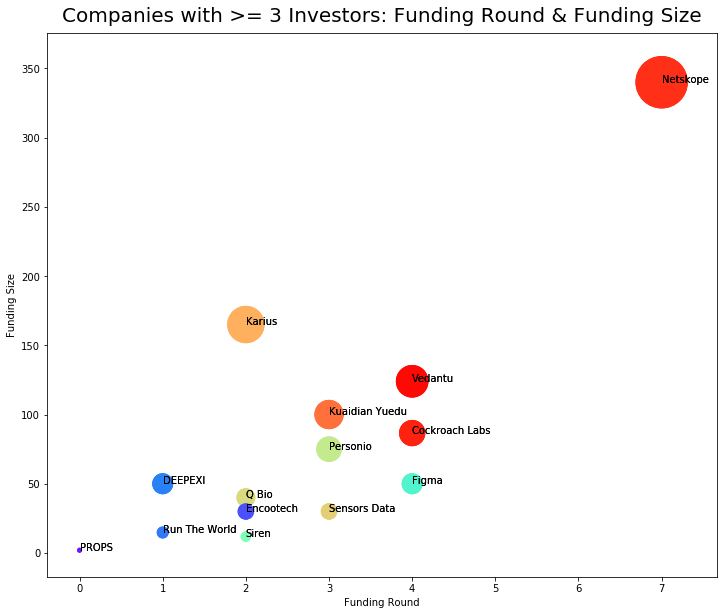

In [128]:
#bubble chart: org name, x = series, y = num of investors, size = funding size
import matplotlib.cm as cm

plt.figure(figsize=(12,10))

N=14
organization = ['Vedantu','Figma','Run The World','Kuaidian Yuedu','Karius', 'Q Bio', 'Personio', 'Sensors Data', 
                'DEEPEXI', 'Cockroach Labs', 'PROPS','Netskope','Siren','Encootech']
#investor_num = [3, 5, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
#ICO0, A1, B2, C3, D4, E5, F6, G7 
#series = ['D', 'D', 'A', "C", 'B', 'B', 'C', 'C', 'A', 'D', 'ICO', 'G', 'B', 'B']
funding_round = [4, 4, 1, 3, 2, 2, 3, 3, 1, 4, 0, 7, 2, 2]
investment_size = [124, 50, 14.8, 100, 165, 40, 75, 30, 50, 86.6, 2, 340, 11.8, 30]
size = [1000, 400, 120, 800, 1320, 320, 600, 240, 400, 640, 16, 2640, 88, 240]

# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(funding_round,investment_size,s=size,color=colors)
for i in range(N):
    plt.annotate(organization[i],xy=(funding_round[i],investment_size[i]))
plt.xlabel('Funding Round')
plt.ylabel('Funding Size')

plt.scatter(funding_round,investment_size,s=size,color=colors)
for i in range(N):
    plt.annotate(organization[i],xy=(funding_round[i],investment_size[i]))

# Move title up with the "y" option
plt.title('Companies with >= 3 Investors: Funding Round & Funding Size',y=1.01, size=20)
plt.show()



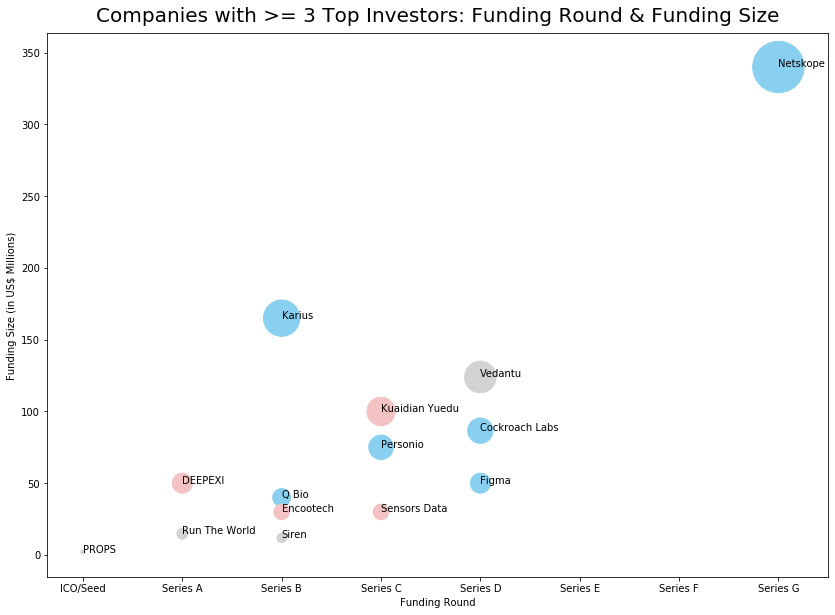

In [203]:
#bubble chart: org name, x = series, y = num of investors, size = funding size
#currently the data is hard-coded, would be interesting to automate it based on selecting subsets from the dataframe 
import matplotlib.cm as cm

plt.figure(figsize=(14,10))

org_both = ['Vedantu', 'Run The World', 'PROPS', 'Siren']
fund_both = [4, 1, 0, 2]
invest_both = [124, 14.8, 2, 11.8]
size_both = [1000, 120, 16, 88]

org_usa = ['Figma', 'Karius', 'Q Bio', 'Personio', 'Cockroach Labs', 'Netskope']
fund_usa = [4, 2, 2, 3, 4, 7]
invest_usa = [50, 165, 40, 75, 86.6, 340]
size_usa = [400, 1320, 320, 600, 640, 2640]

org_china = ['Kuaidian Yuedu', 'Sensors Data', 'DEEPEXI', 'Encootech']
fund_china = [3, 3, 1, 2]
invest_china = [100, 30, 50, 30]
size_china = [800, 240, 400, 240]
 
#plot companies invested by both US and China investors
plt.scatter(fund_both,invest_both,s=size_both,color='#d3d3d3')
for i in range(len(org_both)):
    plt.annotate(org_both[i],xy=(fund_both[i],invest_both[i]))
    
#plot companies invested by US investors
plt.scatter(fund_usa,invest_usa,s=size_usa,color='#89cff0')
for i in range(len(org_usa)):
    plt.annotate(org_usa[i],xy=(fund_usa[i],invest_usa[i]))

#plot companies invested by China investors
plt.scatter(fund_china,invest_china,s=size_china,color='#f4c2c2')
for i in range(len(org_china)):
    plt.annotate(org_china[i],xy=(fund_china[i],invest_china[i]))
    

#labels = [item.get_text() for item in ax.get_xticklabels()]
#labels[1] = 'Testing'
#ax.set_xticklabels(labels)
#ICO0, A1, B2, C3, D4, E5, F6, G7 
plt.xticks(np.arange(8), ['ICO/Seed', 'Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G'])

plt.xlabel('Funding Round')
plt.ylabel('Funding Size (in US$ Millions)')

#ax.legend(('USA VC Investments','China VC Investments', 'Both'))

# Move title up with the "y" option
plt.title('Companies with >= 3 Top Investors: Funding Round & Funding Size',y=1.01, size=20)
plt.show()

In [99]:
usa['Organization Name'].value_counts()

Figma            5
Run The World    3
Personio         3
Karius           3
Netskope         3
                ..
Anyfin           1
Vendia           1
Octant Bio       1
Suki             1
Stash            1
Name: Organization Name, Length: 348, dtype: int64

In [101]:
china['Organization Name'].value_counts()

Kuaidian Yuedu          4
Sensors Data            3
Vedantu                 3
Encootech               3
DEEPEXI                 3
                       ..
JenaValve Technology    1
ADVANCE.AI              1
Yasten                  1
Guoxing Aerospace       1
Ferrum Health           1
Name: Organization Name, Length: 190, dtype: int64

In [140]:
df.shape

(648, 7)

In [152]:
df['Organization Name'].value_counts()

Vedantu                   5
Figma                     5
Run The World             5
Kuaidian Yuedu            4
Karius                    3
                         ..
taxProper                 1
DroneBase                 1
Yasten                    1
Neurophth Therapeutics    1
Canva                     1
Name: Organization Name, Length: 528, dtype: int64

In [158]:
df['Organization Name'].value_counts() > 2

Vedantu                    True
Figma                      True
Run The World              True
Kuaidian Yuedu             True
Karius                     True
                          ...  
taxProper                 False
DroneBase                 False
Yasten                    False
Neurophth Therapeutics    False
Canva                     False
Name: Organization Name, Length: 528, dtype: bool

In [100]:
#top_14 = df[(df['Organization Name'] == 'Vedantu'  df['Organization Name'] == 'Figtma'  )]

In [101]:
#loligraph = pd.DataFrame.from_dict(lollipop)

In [40]:
# Make the plot
plt.stem(lollipop.values())
plt.xticks(lollipop.values(), lollipop.keys())
 
 
# Vertical version
plt.hlines(y=my_range, xmin=0, xmax=lollipop.values(), color='skyblue')
plt.plot(lollipop.values(), my_range, "D")
plt.yticks(lollipop.values(), lollipop.keys())
plt.show()

C:\Users\owner\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


TypeError: len() of unsized object

TypeError: len() of unsized object

# Funding round distribution US vs China

In [ ]:
funding_round = df['Funding Round']

# Every VC's activeness (investments made) every month

# Correlation of Check Size vs Leading an Investment